In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import math
from scipy.stats import pearsonr

warnings.filterwarnings('ignore')

In [2]:
household = pd.read_csv('/Users/jayneteo/Dropbox/SMU MITB/Term 2 2021/AML/Project/NHTS/csv/hhpub.csv')
person = pd.read_csv('/Users/jayneteo/Dropbox/SMU MITB/Term 2 2021/AML/Project/NHTS/csv/perpub.csv')
veh = pd.read_csv('/Users/jayneteo/Dropbox/SMU MITB/Term 2 2021/AML/Project/NHTS/csv/vehpub.csv')
trip= pd.read_csv('/Users/jayneteo/Dropbox/SMU MITB/Term 2 2021/AML/Project/NHTS/csv/trippub.csv')




In [3]:
# as only studying hh with car will also filter out hh with HHVEHCNT == 0
ny = household[household['HHSTATE'] =="NY"]
ny = ny[ny['HHVEHCNT']>0]

In [4]:
#define function 

def cat_col_prop(data, col):
    print(pd.concat([data[col].value_counts(),
          data[col].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage')))

    sns.countplot(data[col], order =  data[col].value_counts().index)

## 1. Household

In [5]:
#15636 households in NY with at least one vehicle
ny.shape

(15636, 58)

In [6]:
ny.columns

Index(['HOUSEID', 'TRAVDAY', 'SAMPSTRAT', 'HOMEOWN', 'HHSIZE', 'HHVEHCNT',
       'HHFAMINC', 'PC', 'SPHONE', 'TAB', 'WALK', 'BIKE', 'CAR', 'TAXI', 'BUS',
       'TRAIN', 'PARA', 'PRICE', 'PLACE', 'WALK2SAVE', 'BIKE2SAVE', 'PTRANS',
       'HHRELATD', 'DRVRCNT', 'CNTTDHH', 'HHSTATE', 'HHSTFIPS', 'NUMADLT',
       'YOUNGCHILD', 'WRKCOUNT', 'TDAYDATE', 'HHRESP', 'LIF_CYC', 'MSACAT',
       'MSASIZE', 'RAIL', 'URBAN', 'URBANSIZE', 'URBRUR', 'SCRESP', 'CENSUS_D',
       'CENSUS_R', 'CDIVMSAR', 'HH_RACE', 'HH_HISP', 'HH_CBSA', 'RESP_CNT',
       'WEBUSE17', 'SMPLSRCE', 'WTHHFIN', 'HBHUR', 'HTHTNRNT', 'HTPPOPDN',
       'HTRESDN', 'HTEEMPDN', 'HBHTNRNT', 'HBPPOPDN', 'HBRESDN'],
      dtype='object')

min value: 0 should keep these values too 1411 occurences of total 15636 ( 9.024047070862114 %)


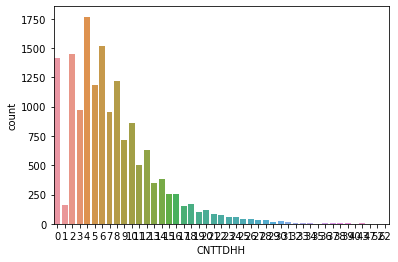

In [7]:
# label - cause of the zero values may not be able to log
sns.countplot(ny['CNTTDHH'])
print("min value:",str(min(ny['CNTTDHH'])),"should keep these values too",str(sum(ny['CNTTDHH']==0)), "occurences of total", len(ny), "(", str(sum(ny['CNTTDHH']==0)/len(ny)*100),"%)" )


### MSACAT

   counts  percentage
3    6936   44.359171
1    4384   28.037861
4    2635   16.852136
2    1681   10.750831


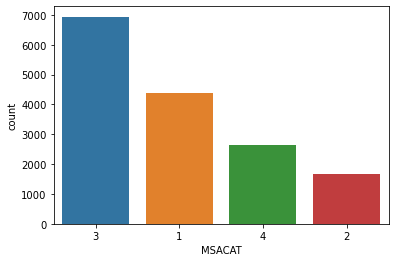

In [8]:
#Metropolitan Statistical Area (MSA) category for the household's home address
#majority are in MSA = 3 >> MSA less than 1 million based on household's home


ny['MSACAT'].value_counts()

cat_col_prop(ny,'MSACAT')


   counts  percentage
5    4384   28.037861
1    4067   26.010489
6    2635   16.852136
3    2135   13.654387
4    1681   10.750831
2     734    4.694295


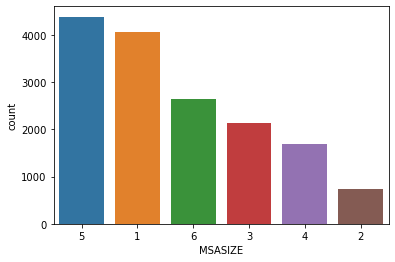

In [9]:
#Population size category of the Metropolitan Statistical Area (MSA), from the 2010-2014 five-year American Community Survey (ACS) API.

#05= In an MSA or CMSA of 3 million or more

ny['MSASIZE'].value_counts()

cat_col_prop(ny,'MSASIZE')

    counts  percentage
23    6933   44.339985
21    4380   28.012279
24    2634   16.845741
22    1680   10.744436
51       3    0.019186
13       2    0.012791
33       1    0.006395
52       1    0.006395
54       1    0.006395
31       1    0.006395


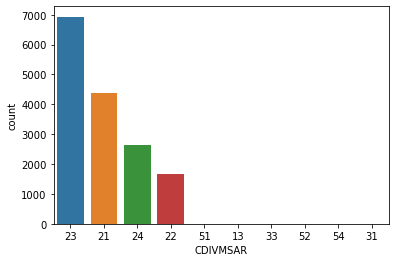

In [10]:
#Grouping of household by 2 combination of census division, MSA status, 
#and presence of a subway system when population greater than 1 million

#23=Mid-Atlantic (NY, NJ, PA) MSA of less than 1 million
#21=Mid-Atlantic (NY, NJ, PA) MSA or CMSA of 1 million or more with heavy rail
#24=Mid-Atlantic (NY, NJ, PA) Not in a MSA
#22=Mid-Atlantic (NY, NJ, PA) MSA or CMSA of 1 million or more without heavy rail

ny['CDIVMSAR'].value_counts()

cat_col_prop(ny,'CDIVMSAR')

    counts  percentage
23    6933   44.365521
21    4380   28.028412
24    2634   16.855443
22    1680   10.750624


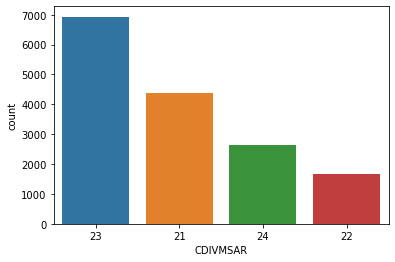

In [11]:
ny = ny[ny['CDIVMSAR'].isin([21,22,23,24])]
ny['CDIVMSAR'].value_counts()
cat_col_prop(ny,'CDIVMSAR')

### Core Based Statistical Area FIPS code

       counts  percentage
XXXXX    9567   61.220964
35620    4380   28.028412
40380     901    5.765662
15380     779    4.984962


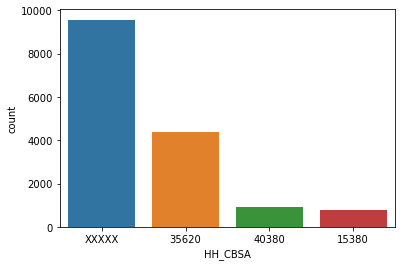

In [12]:
#Core Based Statistical Area (CBSA) FIPS code for the respondent's home address

ny['HH_CBSA'].value_counts()

cat_col_prop(ny,'HH_CBSA')

# significant number of households under the 'XXXXX=Suppressed, in an MSA of less than 1 million ' category

In [13]:
ny.head()

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
2,30000012,5,3,1,1,2,10,1,1,3,...,2,79.419586,C,80,17000,17000,5000,60,17000,7000
8,30000082,3,3,2,4,2,8,1,1,5,...,2,1148.809332,T,20,1500,300,750,30,750,300
15,30000130,1,1,1,2,1,5,-9,1,-9,...,1,3829.959655,U,60,30000,17000,5000,70,30000,17000
39,30000380,2,3,2,3,1,3,1,1,2,...,2,370.744472,S,50,3000,1500,1500,50,3000,1500
44,30000434,7,3,1,2,2,8,1,1,3,...,2,101.472420,R,30,1500,750,750,30,750,300


### Travel Dayof Week Lower

   counts  percentage
2    2272   14.538939
5    2268   14.513342
1    2250   14.398157
7    2247   14.378959
6    2227   14.250976
3    2202   14.090996
4    2161   13.828630


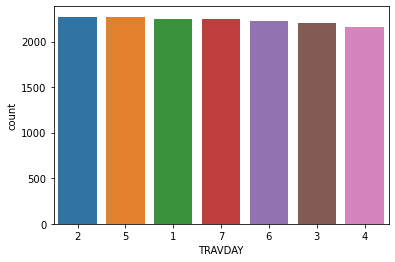

In [14]:
#relatively equal number of days of the week
ny['TRAVDAY'].value_counts()

cat_col_prop(ny,'TRAVDAY')

### Home ownership

     counts  percentage
 1    12790   81.845524
 2     2719   17.399373
 97     117    0.748704
-7        1    0.006399


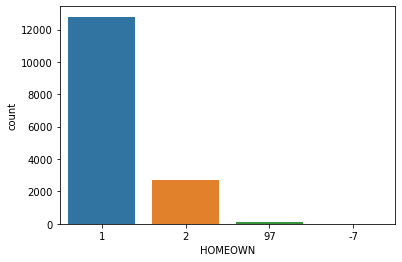

In [15]:
# Majority Own home while 17 percent rent the rest to replace with 'NA' (to remove while one hot encoding)

cat_col_prop(ny,'HOMEOWN')

ny['HOMEOWN'] = ny['HOMEOWN'].replace({1:"HOME_OWN",
                                       2: "HOME_RENT",
                                      97: "NA",
                                      -7: "NA"})

           counts  percentage
HOME_OWN    12790   81.845524
HOME_RENT    2719   17.399373
NA            118    0.755103


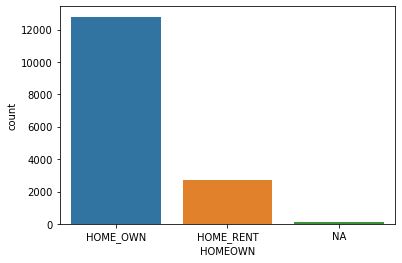

In [16]:
cat_col_prop(ny,'HOMEOWN')

### HHVEHCTN

    counts  percentage
2     6329   40.500416
1     5817   37.224035
3     2257   14.442951
4      795    5.087349
5      281    1.798170
6       92    0.588725
7       34    0.217572
8       12    0.076790
9        6    0.038395
11       2    0.012798
12       2    0.012798
________
new HHVEHCNT
    counts  percentage
2     6329   40.500416
1     5817   37.224035
>2    3481   22.275549


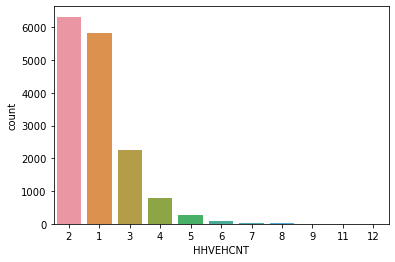

In [17]:
#count of household vehicles

cat_col_prop(ny,'HHVEHCNT')

ny['HHVEHCNT'][ny['HHVEHCNT']>2] = ">2"

print("________")
print("new HHVEHCNT")
print(pd.concat([ny['HHVEHCNT'].value_counts(),
          ny['HHVEHCNT'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
    )

### HHFAMINC

     counts  percentage
 6     2869   18.359250
 7     2180   13.950214
 5     1873   11.985666
 8     1666   10.661035
 4     1445    9.246816
 3     1233    7.890190
 9      960    6.143214
 11     921    5.893646
 10     884    5.656876
 2      610    3.903500
-7      489    3.129199
 1      419    2.681257
-8       76    0.486338
-9        2    0.012798


<AxesSubplot:xlabel='HHFAMINC', ylabel='count'>

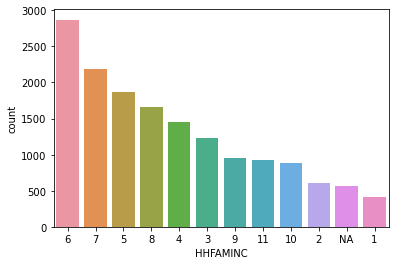

In [18]:
# Household family income 
# Group all negative as 'NA'

print(pd.concat([ny['HHFAMINC'].value_counts(),
          ny['HHFAMINC'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

ny['HHFAMINC'][ny['HHFAMINC'].isin([-9,-8,-7])]  = "NA"

sns.countplot(data = ny, x= 'HHFAMINC', order = ny['HHFAMINC'].value_counts().index)

### DRVRCNT

          counts  percentage
1.000000   11705   74.902412
0.500000    1759   11.256159
0.666667     997    6.379983
0.750000     267    1.708581
0.333333     263    1.682985
0.400000     259    1.657388
0.600000      93    0.595124
0.250000      66    0.422346
0.800000      60    0.383951
0.000000      56    0.358354
0.200000      25    0.159980
0.285714      14    0.089589
0.428571      14    0.089589
0.833333       9    0.057593
0.166667       9    0.057593
0.571429       7    0.044794
0.142857       5    0.031996
0.375000       5    0.031996
0.222222       3    0.019198
0.714286       3    0.019198
0.300000       2    0.012798
0.700000       1    0.006399
0.555556       1    0.006399
0.272727       1    0.006399
0.111111       1    0.006399
0.857143       1    0.006399
0.625000       1    0.006399


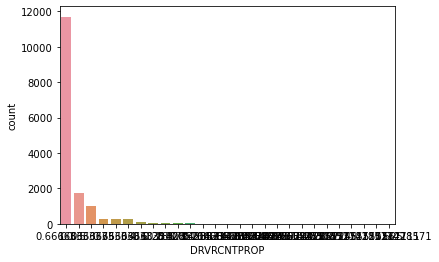

In [19]:
ny['DRVRCNTPROP'] = ny['DRVRCNT']/ny['HHSIZE']
cat_col_prop(ny,'DRVRCNTPROP')

Pearson Corelation of:  0.8662411997810033 between DRVRCNT and NUMADLT. May remove one is too many variables


<AxesSubplot:xlabel='DRVRCNT', ylabel='NUMADLT'>

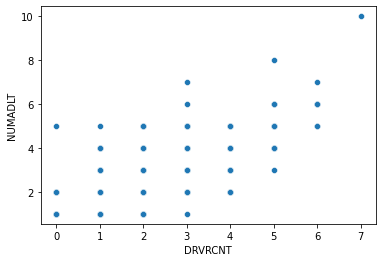

In [20]:
#number of drivers in the household 

corr,_ = pearsonr(ny['DRVRCNT'],ny['NUMADLT'])
print("Pearson Corelation of: ",str(corr), "between DRVRCNT and NUMADLT. May remove one is too many variables")

sns.scatterplot(x = ny['DRVRCNT'], y = ny['NUMADLT'])


   counts  percentage
2    8170   52.281308
1    5846   37.409612
3    1187    7.595828
4     316    2.022141
0      56    0.358354
5      44    0.281564
6       7    0.044794
7       1    0.006399
_______________________
new value counts for DRVRCNT
    counts  percentage
2     8170   52.281308
1     5846   37.409612
>2    1555    9.950726
0       56    0.358354


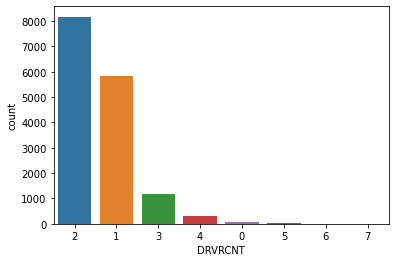

In [21]:
cat_col_prop(ny,'DRVRCNT')

# will bin those with >2 drivers together
ny['DRVRCNT'][ny['DRVRCNT']>2] = ">2"

print("_______________________")
print("new value counts for DRVRCNT")

print(pd.concat([ny['DRVRCNT'].value_counts(),
          ny['DRVRCNT'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

    counts  percentage
2     8170   52.281308
1     5846   37.409612
>2    1555    9.950726
0       56    0.358354


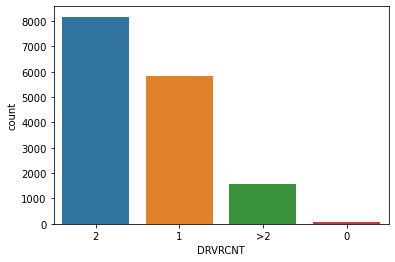

In [22]:
cat_col_prop(ny,'DRVRCNT')

In [23]:
# interestingly got 0.3% (56) of the household got 0 drivers but have cars 
ny[ny['DRVRCNT']==0].describe() 

,HOUSEID,TRAVDAY,SAMPSTRAT,HHSIZE,PC,SPHONE,TAB,WALK,BIKE,CAR,...,SMPLSRCE,WTHHFIN,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,DRVRCNTPROP
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,3.550968e+07,4.178571,2.714286,1.392857,2.607143,2.214286,2.839286,1.803571,2.553571,2.410714,...,1.928571,328.238331,26.000000,2998.053571,1402.517857,999.839286,25.107143,3134.660714,1448.053571,0.0
std,5.075576e+06,1.973526,1.090693,0.845922,3.251174,4.305237,4.035194,4.730634,5.141346,1.474348,...,0.259870,673.880020,17.964612,5539.648609,2823.995963,1461.105307,19.704802,5582.059093,2822.493961,0.0
min,3.008108e+07,1.000000,1.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-1.000000,...,1.000000,15.259318,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.0
25%,3.032250e+07,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,2.000000,...,2.000000,53.999105,16.250000,50.000000,50.000000,25.000000,5.000000,300.000000,50.000000,0.0
50%,4.007016e+07,4.000000,3.000000,1.000000,3.000000,5.000000,5.000000,4.000000,5.000000,2.000000,...,2.000000,142.212181,20.000000,300.000000,300.000000,150.000000,20.000000,750.000000,300.000000,0.0
75%,4.039824e+07,6.000000,4.000000,1.250000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,...,2.000000,290.463949,40.000000,3000.000000,1500.000000,1500.000000,40.000000,3000.000000,1500.000000,0.0
max,4.077127e+07,7.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,3834.854389,70.000000,30000.000000,17000.000000,5000.000000,90.000000,30000.000000,17000.000000,0.0


In [24]:
print(pd.concat([ny['DRVRCNT'].value_counts(),
          ny['DRVRCNT'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

    counts  percentage
2     8170   52.281308
1     5846   37.409612
>2    1555    9.950726
0       56    0.358354


### PROPORTION OF NUMADLT / YOUNGCHILD / WRKCOUNT IN A HOUSEHOLD

    counts  percentage
2     8870   56.760735
1     5015   32.091892
3     1316    8.421322
4      348    2.226915
5       66    0.422346
6        8    0.051193
7        2    0.012798
8        1    0.006399
10       1    0.006399
      counts  percentage
1      12702   81.282396
>0.5    2416   15.460421
<0.5     509    3.257183


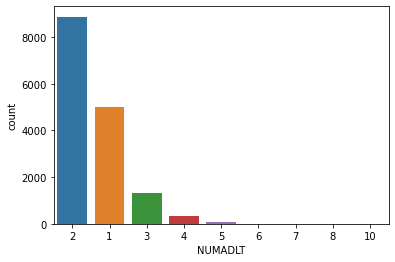

In [25]:
#Proportion of adults in a family 

cat_col_prop(ny,'NUMADLT')

ny['NUMADLT'] = ny['NUMADLT']/ny['HHSIZE']

#Bin into groups
ny['NUMADLT_ratio'] = 'NA'

ny.loc[ny['NUMADLT']==0,'NUMADLT_ratio']= '0'
ny.loc[ny['NUMADLT'].between(0,0.5,inclusive = False),'NUMADLT_ratio'] = '<0.5'
ny.loc[ny['NUMADLT'].between(0.5,1, inclusive = True),'NUMADLT_ratio'] = '>0.5'
ny.loc[ny['NUMADLT']==1,'NUMADLT_ratio'] ='1'
 


print(pd.concat([ny['NUMADLT_ratio'].value_counts(),
          ny['NUMADLT_ratio'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

#about 80% of families comprises of adults 

   counts  percentage
0    5354   34.261215
1    5303   33.934856
2    4229   27.062136
3     586    3.749920
4     141    0.902285
5      12    0.076790
6       1    0.006399
7       1    0.006399
      counts  percentage
0       5354   34.261215
1       4889   31.285595
>0.5    3990   25.532732
<0.5    1394    8.920458


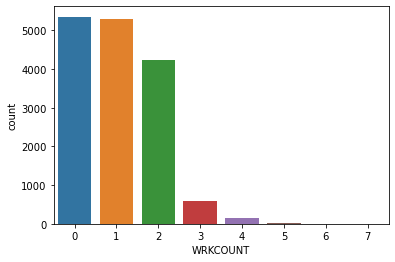

In [26]:
#Proportion of workers in the household 
#0 makes up nearly 34% - meaning they are all retired?

cat_col_prop(ny,'WRKCOUNT')

ny['WRKCOUNT'] = ny['WRKCOUNT']/ny['HHSIZE']


#Bin to groups
ny['WRKCOUNT_ratio'] = 'NA'
ny.loc[ny['WRKCOUNT']==0,'WRKCOUNT_ratio']= '0'
ny.loc[ny['WRKCOUNT'].between(0,0.5,inclusive = False),'WRKCOUNT_ratio'] = '<0.5'
ny.loc[ny['WRKCOUNT'].between(0.5,1, inclusive = True),'WRKCOUNT_ratio'] = '>0.5'
ny.loc[ny['WRKCOUNT']==1,'WRKCOUNT_ratio'] ='1'
 


print(pd.concat([ny['WRKCOUNT_ratio'].value_counts(),
          ny['WRKCOUNT_ratio'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )


   counts  percentage
0   14598   93.415243
1     749    4.792986
2     256    1.638190
3      22    0.140782
4       1    0.006399
5       1    0.006399
      counts  percentage
0      14598   93.415243
<0.5     816    5.221732
>0.5     213    1.363026


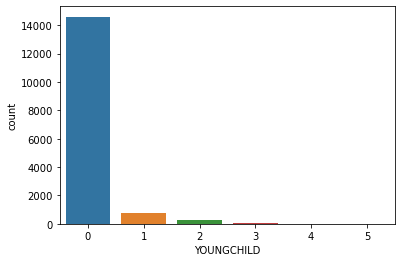

In [27]:
#proportion of family with children

cat_col_prop(ny,'YOUNGCHILD')

ny['YOUNGCHILD'] = ny['YOUNGCHILD']/ny['HHSIZE']


#Bin to groups
ny['YOUNGCHILD_ratio'] = 'NA'
ny.loc[ny['YOUNGCHILD']==0,'YOUNGCHILD_ratio']= '0'
ny.loc[ny['YOUNGCHILD'].between(0,0.5,inclusive = False),'YOUNGCHILD_ratio'] = '<0.5'
ny.loc[ny['YOUNGCHILD'].between(0.5,1, inclusive = True),'YOUNGCHILD_ratio'] = '>0.5'
ny.loc[ny['YOUNGCHILD']==1,'YOUNGCHILD_ratio'] ='1'
 


print(pd.concat([ny['YOUNGCHILD_ratio'].value_counts(),
          ny['YOUNGCHILD_ratio'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )


    counts  percentage
10    4195   26.844564
2     3391   21.699622
1     2467   15.786779
9     2221   14.212581
6     1214    7.768606
4     1084    6.936712
8      604    3.865105
5      228    1.459013
7      131    0.838293
3       92    0.588725


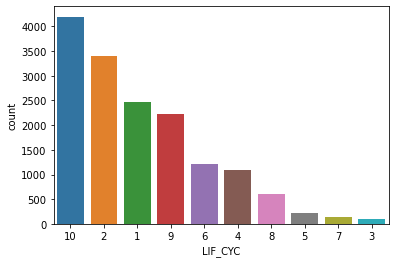

In [28]:
#Life Cycle classification for the C 2 household, derived by attributes pertaining to age, relationship, and work status.

#10=2+ adults, retired, no children
#02=2+ adults, no children
#01=one adult, no children
#09=one adult, retired, no children

cat_col_prop(ny,'LIF_CYC')

### HHSIZE

    counts  percentage
2     6925   44.314328
1     4688   29.999360
3     1963   12.561592
4     1388    8.882063
5      467    2.988417
6      123    0.787099
7       44    0.281564
8       17    0.108786
9        7    0.044794
10       4    0.025597
11       1    0.006399
________
new HHSIZE
    counts  percentage
2     6925   44.314328
1     4688   29.999360
>3    2051   13.124720
3     1963   12.561592


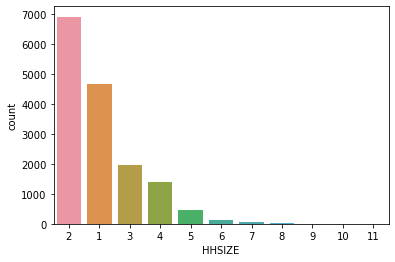

In [29]:
#count of household members

cat_col_prop(ny,'HHSIZE')

# to bin tail HHSIZE

ny['HHSIZE'][ny['HHSIZE']>3] = ">3"

print("________")
print("new HHSIZE")
print(pd.concat([ny['HHSIZE'].value_counts(),
          ny['HHSIZE'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
    )

### URBAN/ URBBUR/ URBANSIZE

   counts  percentage
1   10388   66.474691
2    5239   33.525309


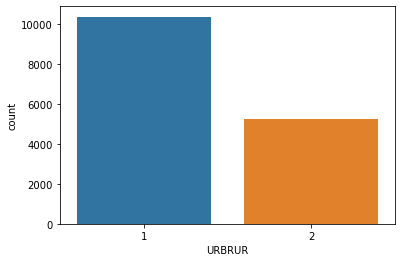

In [30]:
#house in urban / rural areas 

cat_col_prop(ny,'URBRUR')


   counts  percentage
6    6872   43.975171
5    2787   17.834517
1    2525   16.157932
3    1841   11.780892
2    1602   10.251488


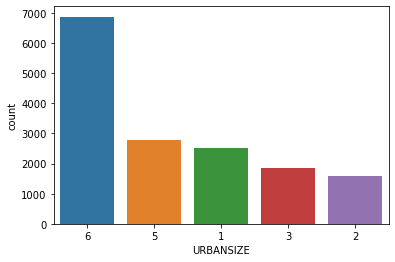

In [31]:
#06 = not in an urbanised area 
#05 - 1 million with heavy rail 


cat_col_prop(ny,'URBANSIZE')

In [32]:
# Final columns selected for HH

ny = ny[['HOUSEID','HH_CBSA','HOMEOWN','HHSIZE','HHVEHCNT','HHFAMINC','NUMADLT_ratio','YOUNGCHILD_ratio','WRKCOUNT_ratio','MSACAT','MSASIZE','URBAN','URBANSIZE','URBRUR','LIF_CYC']]


## 2. Trip

## key issue: Data leakage. 

1. Would be good if can somehow only get the driver trips only (remove duplicate passenger trips)

2. Should use like popular routes distances rather than the actual route info (e.g. think of what a new person if surveyed can answer on the spot) e.g. which route you frequent the most and how far is it

In [33]:
trip.head()

,HOUSEID,PERSONID,TDTRPNUM,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,30000007,1,1,1000,1015,15,5.244,3,0,0,...,20,750,300,50,750,300,350,30,300,300
1,30000007,1,2,1510,1530,20,5.149,3,0,0,...,30,300,300,50,1500,750,750,20,750,300
2,30000007,2,1,700,900,120,84.004,6,0,0,...,40,1500,750,50,1500,750,750,20,750,300
3,30000007,2,2,1800,2030,150,81.628,6,0,0,...,20,750,300,40,1500,750,750,40,1500,750
4,30000007,3,1,845,900,15,2.250,3,0,0,...,20,750,300,50,750,300,350,60,750,300


In [34]:
[c for c in trip.columns]

['HOUSEID',
 'PERSONID',
 'TDTRPNUM',
 'STRTTIME',
 'ENDTIME',
 'TRVLCMIN',
 'TRPMILES',
 'TRPTRANS',
 'TRPACCMP',
 'TRPHHACC',
 'VEHID',
 'TRWAITTM',
 'NUMTRANS',
 'TRACCTM',
 'DROP_PRK',
 'TREGRTM',
 'WHODROVE',
 'WHYFROM',
 'LOOP_TRIP',
 'TRPHHVEH',
 'HHMEMDRV',
 'HH_ONTD',
 'NONHHCNT',
 'NUMONTRP',
 'PSGR_FLG',
 'PUBTRANS',
 'TRIPPURP',
 'DWELTIME',
 'TDWKND',
 'VMT_MILE',
 'DRVR_FLG',
 'WHYTRP1S',
 'ONTD_P1',
 'ONTD_P2',
 'ONTD_P3',
 'ONTD_P4',
 'ONTD_P5',
 'ONTD_P6',
 'ONTD_P7',
 'ONTD_P8',
 'ONTD_P9',
 'ONTD_P10',
 'ONTD_P11',
 'ONTD_P12',
 'ONTD_P13',
 'TDCASEID',
 'TRACC_WLK',
 'TRACC_POV',
 'TRACC_BUS',
 'TRACC_CRL',
 'TRACC_SUB',
 'TRACC_OTH',
 'TREGR_WLK',
 'TREGR_POV',
 'TREGR_BUS',
 'TREGR_CRL',
 'TREGR_SUB',
 'TREGR_OTH',
 'WHYTO',
 'TRAVDAY',
 'HOMEOWN',
 'HHSIZE',
 'HHVEHCNT',
 'HHFAMINC',
 'DRVRCNT',
 'HHSTATE',
 'HHSTFIPS',
 'NUMADLT',
 'WRKCOUNT',
 'TDAYDATE',
 'HHRESP',
 'LIF_CYC',
 'MSACAT',
 'MSASIZE',
 'RAIL',
 'URBAN',
 'URBANSIZE',
 'URBRUR',
 'GASPRICE',
 'CE

In [35]:
# to get only tripcounts of the driver only

trip = trip[trip['PERSONID']==trip['WHODROVE']]

In [36]:
trip = trip[['HOUSEID','PERSONID','TRAVDAY','TRPMILES','TRPHHVEH','TRPTRANS','WHYTRP1S','WHYTRP90','TRVLCMIN',
'TRWAITTM']]
ny_trip = trip[trip['HOUSEID'].isin(ny['HOUSEID'])]

In [37]:
ny_trip.shape

(75317, 10)

In [38]:
sum(ny_trip['TRWAITTM']<0)/ny_trip.shape[0]

0.999761010130515

### Trip Transport

In [39]:
ny_trip['TRPTRANS'].value_counts()
# TO CHECK 8 - do we want to count motorbike/mopeds as vehicles???
ny_trip = ny_trip[ny_trip['TRPTRANS'].isin([3,4,5,6,8])]


,counts,percentages
6,11841,15.765508
5,11361,15.126420
4,11349,15.110442
3,11262,14.994608
2,11087,14.761607
7,9957,13.257087
1,8250,10.984329


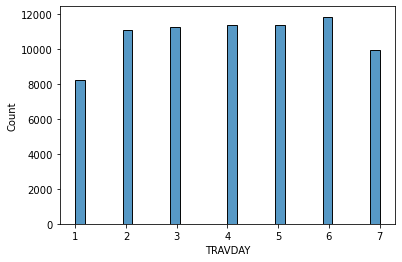

In [40]:
sns.histplot(ny_trip['TRAVDAY'])

pd.concat([ny_trip['TRAVDAY'].value_counts(),
           ny_trip['TRAVDAY'].value_counts(normalize = True).mul(100)],
          axis = 1, keys=('counts','percentages'))

## Why Trip

In [41]:
# since only 24 lines with trip distance <= 0, removed lines
print('# of trips with dist <=0,', str(sum(ny_trip['TRPMILES']<=0)),' out of', str(len(ny_trip)))

ny_trip = ny_trip[ny_trip['TRPMILES']>0]

# of trips with dist <=0, 20  out of 75107


In [42]:
purpose_summ = ny_trip.groupby(['HOUSEID','PERSONID','WHYTRP90']).agg(avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        mod  = ('TRPMILES', lambda x: x.value_counts().index[0])
                                           ).unstack().reset_index()

In [43]:
ny_trip.groupby(['HOUSEID','PERSONID','WHYTRP90']).agg(avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        mod  = ('TRPMILES', lambda x: x.value_counts().index[0]),
                                            skew = ('TRPMILES','skew'),
                                            count = ('TRPMILES','count')
                                           )

avg      med     mod      skew  count
HOUSEID  PERSONID WHYTRP90                                            
30000012 1        1          7.95250   7.9525   6.818       NaN      2
                  2          4.29100   4.2910   4.291       NaN      1
                  8         48.87900  48.8790  49.457       NaN      2
                  10         2.21575   2.2270   3.395 -0.000946      4
30000082 1        1          1.75200   1.7520   0.777       NaN      2
...                              ...      ...     ...       ...    ...
40793974 1        10         3.62175   3.6370   3.496 -0.073407      4
40794020 1        3          5.26600   5.2660   5.266       NaN      2
                  4          0.83600   0.8360   0.836       NaN      2
         2        3          5.30200   5.3020   5.302       NaN      1
                  6         18.71050  18.7105  22.182       NaN      2

[37619 rows x 5 columns]

In [46]:
ny_trip[['TRPMILES','HOUSEID','PERSONID']][ny_trip['WHYTRP90']==1].groupby(['HOUSEID','PERSONID']).agg(avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        mod  = ('TRPMILES', lambda x: x.value_counts().index[0])
                                           )

avg      med     mod
HOUSEID  PERSONID                          
30000012 1          7.9525   7.9525   6.818
30000082 1          1.7520   1.7520   0.777
30000380 2          1.1815   1.1815   1.191
30000436 1          1.2465   1.2465   0.678
30000439 4          0.0815   0.0815   0.082
...                    ...      ...     ...
40792484 1          2.5350   2.5350   2.535
40792552 1          9.6435   9.6435   9.771
         2         10.6285  10.6285  10.949
40793555 3          1.5440   1.5440   2.140
         4         20.2440  20.2440  20.688

[7708 rows x 3 columns]

In [47]:
purpose_summ

HOUSEID PERSONID     avg                                           \
WHYTRP90                          1       2         3       4   5          6   
0         30000012        1  7.9525   4.291       NaN     NaN NaN        NaN   
1         30000082        1  1.7520     NaN       NaN  1.8925 NaN        NaN   
2         30000082        2     NaN  45.341  2.136000     NaN NaN        NaN   
3         30000380        2  1.1815     NaN  1.896667     NaN NaN   2.206333   
4         30000434        1     NaN   0.168  0.333333     NaN NaN        NaN   
...            ...      ...     ...     ...       ...     ...  ..        ...   
19159     40793808        1     NaN     NaN       NaN     NaN NaN        NaN   
19160     40793808        2     NaN     NaN  3.048000  4.4740 NaN        NaN   
19161     40793974        1     NaN     NaN  6.609500     NaN NaN        NaN   
19162     40794020        1     NaN     NaN  5.266000  0.8360 NaN        NaN   
19163     40794020        2     NaN     NaN  5.302000     NaN NaN  18.710500   

                            ...    mod                                    \
WHYTRP90       8        10  ...      1       2      3      4   5       6   
0         48.879   2.21575  ...  6.818   4.291    NaN    NaN NaN     NaN   
1            NaN   1.43200  ...  0.777     NaN    NaN  1.075 NaN     NaN   
2            NaN  88.58100  ...    NaN  45.341  2.136    NaN NaN     NaN   
3            NaN       NaN  ...  1.191     NaN  0.713    NaN NaN   3.318   
4            NaN       NaN  ...    NaN   0.168  0.486    NaN NaN     NaN   
...          ...       ...  ...    ...     ...    ...    ...  ..     ...   
19159        NaN   3.48900  ...    NaN     NaN    NaN    NaN NaN     NaN   
19160        NaN   1.81450  ...    NaN     NaN  2.243  5.435 NaN     NaN   
19161      5.018   3.62175  ...    NaN     NaN  5.139    NaN NaN     NaN   
19162        NaN       NaN  ...    NaN     NaN  5.266  0.836 NaN     NaN   
19163        NaN       NaN  ...    NaN     NaN  5.302    NaN NaN  22.182   

                                     
WHYTRP90       8      10     11  99  
0         49.457   3.395    NaN NaN  
1            NaN   1.432    NaN NaN  
2            NaN  88.581    NaN NaN  
3            NaN     NaN    NaN NaN  
4            NaN     NaN    NaN NaN  
...          ...     ...    ...  ..  
19159        NaN   3.489  3.748 NaN  
19160        NaN   2.745    NaN NaN  
19161      5.018   3.496    NaN NaN  
19162        NaN     NaN    NaN NaN  
19163        NaN     NaN    NaN NaN  

[19164 rows x 32 columns]

In [48]:
ny_trip['hh_person_id'] = ny_trip['HOUSEID'].astype('str')+'-'+ ny_trip['PERSONID'].astype('str')


In [49]:
ny_trip['hh_person_id']

8         30000012-1
9         30000012-1
10        30000012-1
11        30000012-1
12        30000012-1
             ...    
923363    40794020-1
923364    40794020-1
923367    40794020-2
923368    40794020-2
923369    40794020-2
Name: hh_person_id, Length: 75087, dtype: object

In [50]:
why = ny_trip.groupby(['hh_person_id','WHYTRP90']).agg(#avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        #mod  = ('TRPMILES', lambda x: x.value_counts().index[0])
                                           ).unstack().reset_index()

In [51]:
[c for c in why]

[('hh_person_id', ''),
 ('med', 1),
 ('med', 2),
 ('med', 3),
 ('med', 4),
 ('med', 5),
 ('med', 6),
 ('med', 8),
 ('med', 10),
 ('med', 11),
 ('med', 99)]

<AxesSubplot:xlabel="('med', 1)", ylabel='Count'>

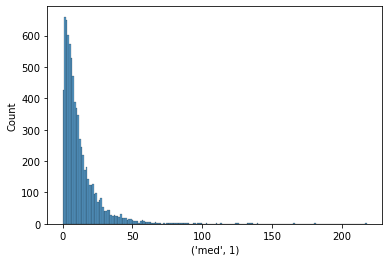

In [52]:
sns.histplot(why[('med',1)])

In [53]:
why

hh_person_id     med                                               \
WHYTRP90                    1       2       3       4   5        6       8   
0          30000012-1  7.9525   4.291     NaN     NaN NaN      NaN  48.879   
1          30000082-1  1.7520     NaN     NaN  1.8925 NaN      NaN     NaN   
2          30000082-2     NaN  45.341  2.1360     NaN NaN      NaN     NaN   
3          30000380-2  1.1815     NaN  2.2100     NaN NaN   1.9610     NaN   
4          30000434-1     NaN   0.168  0.2730     NaN NaN      NaN     NaN   
...               ...     ...     ...     ...     ...  ..      ...     ...   
19159      40793808-1     NaN     NaN     NaN     NaN NaN      NaN     NaN   
19160      40793808-2     NaN     NaN  2.2430  4.4740 NaN      NaN     NaN   
19161      40793974-1     NaN     NaN  6.6095     NaN NaN      NaN   5.018   
19162      40794020-1     NaN     NaN  5.2660  0.8360 NaN      NaN     NaN   
19163      40794020-2     NaN     NaN  5.3020     NaN NaN  18.7105     NaN   

                              
WHYTRP90       10     11  99  
0          2.2270    NaN NaN  
1          1.4320    NaN NaN  
2         88.5810    NaN NaN  
3             NaN    NaN NaN  
4             NaN    NaN NaN  
...           ...    ...  ..  
19159      3.4890  3.748 NaN  
19160      1.8145    NaN NaN  
19161      3.6370    NaN NaN  
19162         NaN    NaN NaN  
19163         NaN    NaN NaN  

[19164 rows x 11 columns]

In [54]:
why_col = why.columns

In [55]:
new  = pd.DataFrame()
for i in range(1, len(why.columns)):
    new[why_col[i]] = ~np.isnan(why.iloc[:,i])

In [56]:
chart_data = new.stack().reset_index()
chart_data

,level_0,level_1,0
0,0,"(med, 1)",True
1,0,"(med, 2)",True
2,0,"(med, 3)",False
3,0,"(med, 4)",False
4,0,"(med, 5)",False
...,...,...,...
191635,19163,"(med, 6)",True
191636,19163,"(med, 8)",False
191637,19163,"(med, 10)",False
191638,19163,"(med, 11)",False


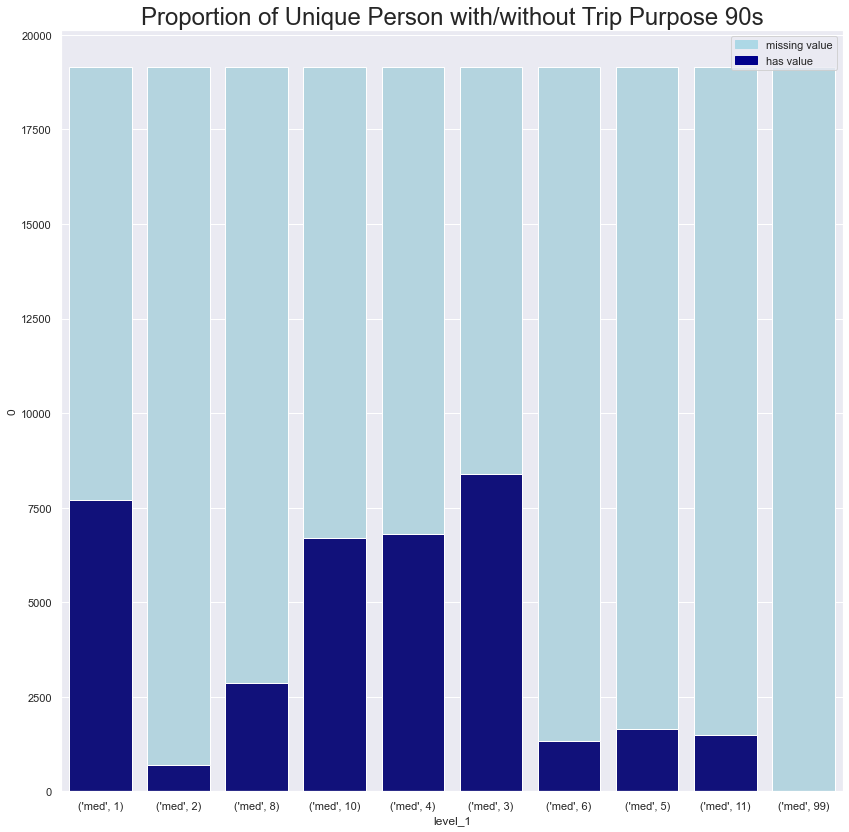

In [57]:
import matplotlib.patches as mpatches

sns.set(style="darkgrid")
plt.figure(figsize=(14, 14))

full_data = chart_data.groupby('level_1')[0].count().reset_index()

bar1= sns.barplot(data = full_data, x = "level_1", y = 0, color = 'lightblue')

has_value = chart_data[chart_data[0]==True]

bar2 = sns.barplot(data = has_value, estimator = sum, ci = None, x = "level_1", y = 0, color = 'darkblue')

bottom_bar = mpatches.Patch(color = 'darkblue', label = 'has value')
top_bar = mpatches.Patch(color = 'lightblue', label = 'missing value')

plt.title('Proportion of Unique Person with/without Trip Purpose 90s', fontsize = 24)
plt.legend(handles = [top_bar, bottom_bar])
plt.show()

## Instead use feature cross of most common reason x dist cat for that reason

<AxesSubplot:xlabel='TRPMILES', ylabel='Density'>

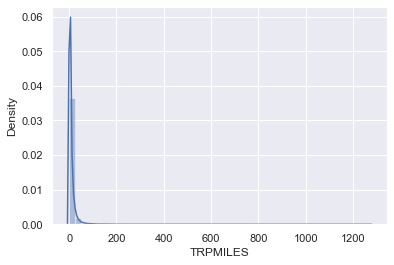

In [58]:
sns.distplot(ny_trip['TRPMILES'])

In [59]:
ny_trip[ny_trip['TRPMILES']> 200]

,HOUSEID,PERSONID,TRAVDAY,TRPMILES,TRPHHVEH,TRPTRANS,WHYTRP1S,WHYTRP90,TRVLCMIN,TRWAITTM,hh_person_id
6354,30007462,1,2,386.648,1,3,1,8,440,-1,30007462-1
17581,30020018,1,4,307.460,1,5,1,10,365,-1,30020018-1
18764,30021241,1,5,306.353,1,3,40,3,335,-1,30021241-1
20651,30023489,1,7,260.981,1,4,50,8,305,-1,30023489-1
28590,30032194,1,1,283.949,1,3,1,11,245,-1,30032194-1
...,...,...,...,...,...,...,...,...,...,...,...
876364,40703779,1,6,286.143,1,3,50,8,185,-1,40703779-1
890231,40729376,1,5,309.981,1,3,50,10,287,-1,40729376-1
894684,40737760,2,1,207.956,1,3,10,2,240,-1,40737760-2
896928,40742011,1,1,228.669,1,6,1,11,270,-1,40742011-1


<AxesSubplot:xlabel='TRVLCMIN', ylabel='TRPMILES'>

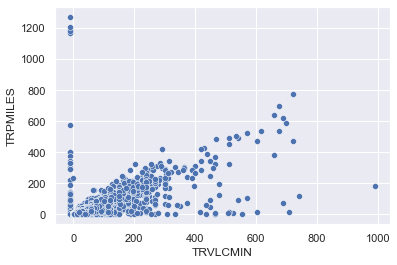

In [60]:
sns.scatterplot(data = ny_trip, x='TRVLCMIN', y = 'TRPMILES')

In [61]:
ny_trip[(ny_trip['TRVLCMIN']<100) & (ny_trip['TRPMILES']>100)]

,HOUSEID,PERSONID,TRAVDAY,TRPMILES,TRPHHVEH,TRPTRANS,WHYTRP1S,WHYTRP90,TRVLCMIN,TRWAITTM,hh_person_id
38630,30042582,1,2,224.420,1,4,40,3,-9,-1,30042582-1
38631,30042582,1,2,222.529,1,4,40,3,-9,-1,30042582-1
52906,30058065,2,2,137.565,1,3,40,3,95,-1,30058065-2
83867,30092515,2,5,127.756,2,6,1,2,99,-1,30092515-2
96763,30106948,2,1,231.503,1,8,1,10,0,-1,30106948-2
147991,30163514,2,5,112.172,1,6,40,3,98,-1,30163514-2
218705,30241673,1,3,403.456,1,4,40,3,-9,-1,30241673-1
218707,30241673,1,3,403.585,1,4,1,3,-9,-1,30241673-1
218708,30241673,1,3,402.629,1,4,50,10,-9,-1,30241673-1
218709,30241673,1,3,402.482,1,4,1,10,-9,-1,30241673-1


In [62]:
print(str(sum(ny_trip['TRVLCMIN']<=0)), ' trips missing TRVLCMIN info so will just remove since only ',str(sum(ny_trip['TRVLCMIN']<=0)/len(ny_trip)*100),"%")

72  trips missing TRVLCMIN info so will just remove since only  0.0958887690279276 %


In [63]:
ny_trip = ny_trip[ny_trip['TRVLCMIN']>0]

In [64]:
#bin distances to 5 groups (qcut)

ny_trip['trip distance bins'] = pd.qcut(ny_trip['TRPMILES'],5)

In [65]:
ny_trip.groupby('hh_person_id').agg({'WHYTRP90':pd.Series.mode})


# NEED HELP HERE WANT TO GET THE MODE WHY and then the MODE distance for the respective WHY for that person 
# e.g. Person A - work - 100 mile
#      Person B - school - 1 mile
#      Person C - work - 10 mile

,WHYTRP90
hh_person_id,
30000012-1,10
30000082-1,"[1, 4]"
30000082-2,"[2, 3, 10]"
30000380-2,"[3, 6]"
30000434-1,3
...,...
40793808-1,"[10, 11]"
40793808-2,3
40793974-1,10


In [66]:
## For Trip To me only the above feature cross or if want to do like urbanness of dest can also take via similiar approach e.g. the urbaness of the most common why

In [67]:
ny_trip_count = ny_trip[['HOUSEID','PERSONID','hh_person_id']].groupby(['HOUSEID','PERSONID']).agg('count').reset_index().rename(columns = {'hh_person_id':'n_trips'})

## 3. People

In [68]:
[c for c in person]

['HOUSEID',
 'PERSONID',
 'R_AGE',
 'EDUC',
 'R_HISP',
 'R_RELAT',
 'R_SEX',
 'R_RACE',
 'PRMACT',
 'PAYPROF',
 'GT1JBLWK',
 'WRK_HOME',
 'WKFTPT',
 'WRKTRANS',
 'LSTTRDAY17',
 'OCCAT',
 'SCHTYP',
 'NWALKTRP',
 'WALK4EX',
 'NBIKETRP',
 'BIKE4EX',
 'BIKESHARE',
 'PTUSED',
 'MCUSED',
 'CARSHARE',
 'RIDESHARE',
 'CARRODE',
 'TIMETOWK',
 'NOCONG',
 'PUBTIME',
 'WRKTIME',
 'WKRMHM',
 'FLEXTIME',
 'WKFMHMXX',
 'SCHTRN1',
 'SCHTRN2',
 'DELIVER',
 'MEDCOND',
 'MEDCOND6',
 'HEALTH',
 'PHYACT',
 'VPACT',
 'LPACT',
 'BORNINUS',
 'YRTOUS',
 'YEARMILE',
 'PROXY',
 'WHOPROXY',
 'USEPUBTR',
 'SAMEPLC',
 'W_NONE',
 'W_CANE',
 'W_WLKR',
 'W_WHCANE',
 'W_DOG',
 'W_CRUTCH',
 'W_SCOOTR',
 'W_CHAIR',
 'W_MTRCHR',
 'WORKER',
 'DIARY',
 'OUTCNTRY',
 'FRSTHM17',
 'CNTTDTR',
 'GCDWORK',
 'WKSTFIPS',
 'DRIVER',
 'OUTOFTWN',
 'DISTTOWK17',
 'DISTTOSC17',
 'R_AGE_IMP',
 'R_SEX_IMP',
 'ALT_16',
 'ALT_23',
 'ALT_45',
 'WALK_DEF',
 'WALK_GKQ',
 'BIKE_DFR',
 'BIKE_GKP',
 'CONDTRAV',
 'CONDRIDE',
 'CONDNIGH',
 'CONDRI

In [69]:
# Fitlering NY Drivers only

nyorker = person[(person['HOUSEID'].isin(ny['HOUSEID'])) & (person['DRIVER']==1)]

In [70]:
nyorker['hh_person_id'] = nyorker['HOUSEID'].astype('str') + '-' + nyorker['PERSONID'].astype('str')

In [71]:
[c for c in person]

['HOUSEID',
 'PERSONID',
 'R_AGE',
 'EDUC',
 'R_HISP',
 'R_RELAT',
 'R_SEX',
 'R_RACE',
 'PRMACT',
 'PAYPROF',
 'GT1JBLWK',
 'WRK_HOME',
 'WKFTPT',
 'WRKTRANS',
 'LSTTRDAY17',
 'OCCAT',
 'SCHTYP',
 'NWALKTRP',
 'WALK4EX',
 'NBIKETRP',
 'BIKE4EX',
 'BIKESHARE',
 'PTUSED',
 'MCUSED',
 'CARSHARE',
 'RIDESHARE',
 'CARRODE',
 'TIMETOWK',
 'NOCONG',
 'PUBTIME',
 'WRKTIME',
 'WKRMHM',
 'FLEXTIME',
 'WKFMHMXX',
 'SCHTRN1',
 'SCHTRN2',
 'DELIVER',
 'MEDCOND',
 'MEDCOND6',
 'HEALTH',
 'PHYACT',
 'VPACT',
 'LPACT',
 'BORNINUS',
 'YRTOUS',
 'YEARMILE',
 'PROXY',
 'WHOPROXY',
 'USEPUBTR',
 'SAMEPLC',
 'W_NONE',
 'W_CANE',
 'W_WLKR',
 'W_WHCANE',
 'W_DOG',
 'W_CRUTCH',
 'W_SCOOTR',
 'W_CHAIR',
 'W_MTRCHR',
 'WORKER',
 'DIARY',
 'OUTCNTRY',
 'FRSTHM17',
 'CNTTDTR',
 'GCDWORK',
 'WKSTFIPS',
 'DRIVER',
 'OUTOFTWN',
 'DISTTOWK17',
 'DISTTOSC17',
 'R_AGE_IMP',
 'R_SEX_IMP',
 'ALT_16',
 'ALT_23',
 'ALT_45',
 'WALK_DEF',
 'WALK_GKQ',
 'BIKE_DFR',
 'BIKE_GKP',
 'CONDTRAV',
 'CONDRIDE',
 'CONDNIGH',
 'CONDRI

In [72]:
nyorker = nyorker[['HOUSEID','PERSONID','R_AGE','EDUC','R_RACE','R_SEX','WRK_HOME','WKFTPT','OCCAT','DRIVER']]

## Age

52 count of people with no age.  0.00019679526480316688 %. Prolly can remove
     counts  percentage
 65     780    2.859238
 64     725    2.657625
 60     719    2.635630
 62     717    2.628299
 63     697    2.554985
..      ...         ...
 86      99    0.362903
 87      99    0.362903
 88      73    0.267595
-7       44    0.161290
-8        8    0.029326

[76 rows x 2 columns]


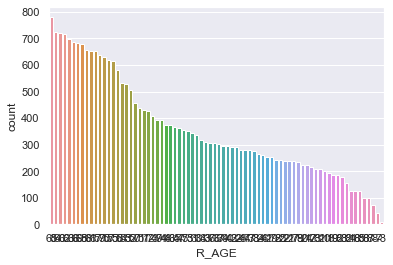

In [84]:
print(str(sum(nyorker['R_AGE']<0)), "count of people with no age. ",str(sum(nyorker['R_AGE']<0)/person.shape[0]),"%. Prolly can remove")
cat_col_prop(nyorker,'R_AGE')


     counts  percentage
 65     780    2.859238
 64     725    2.657625
 60     719    2.635630
 62     717    2.628299
 63     697    2.554985
..      ...         ...
 86      99    0.362903
 87      99    0.362903
 88      73    0.267595
-7       44    0.161290
-8        8    0.029326

[76 rows x 2 columns]

394 people below the age of 18 0.014442815249266862 %


<AxesSubplot:xlabel='R_AGE', ylabel='Count'>

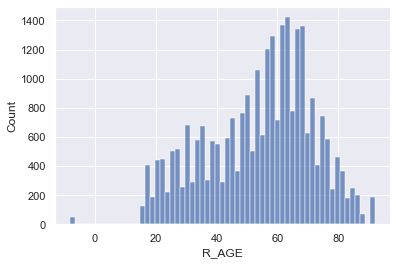

In [74]:
print(pd.concat([nyorker['R_AGE'].value_counts(),
          nyorker['R_AGE'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )
print('')
print(str(sum(nyorker['R_AGE']<18)), 'people below the age of 18', str(sum(nyorker['R_AGE']<18)/len(nyorker['R_AGE'])),"%")


sns.histplot(nyorker['R_AGE'])

# Interesting that a lot of the respondants are older but dont think need to change
# possibly something to do with the fact that the survey was done via landline calls??

## EDUC

    counts  percentage
 3    7619   27.928886
 5    7052   25.850440
 4    6041   22.144428
 2    5619   20.597507
 1     931    3.412757
-7      15    0.054985
-8       3    0.010997


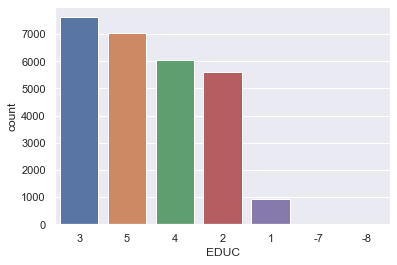

In [75]:
cat_col_prop(nyorker,'EDUC',)

     counts  percentage
 1    24875   91.184018
 3      750    2.749267
 2      712    2.609971
 6      436    1.598240
 97     279    1.022727
-7      132    0.483871
 4       66    0.241935
 5       19    0.069648
-8       11    0.040323


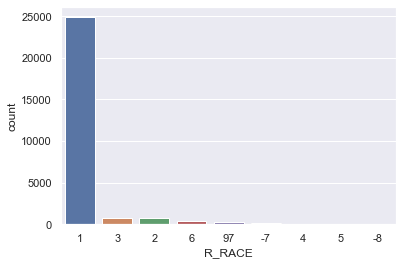

In [76]:
cat_col_prop(nyorker,'R_RACE')

# High proporition of white

    counts  percentage
 2   14154   51.884164
 1   13104   48.035191
-7      20    0.073314
-8       2    0.007331


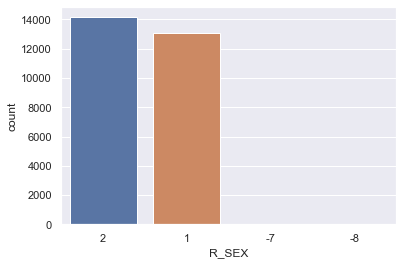

In [77]:
cat_col_prop(nyorker,'R_SEX')

    counts  percentage
 2   13417   49.182551
-1   11549   42.335044
 1    1690    6.195015
-9     623    2.283724
-7       1    0.003666
prolly split -1: not working, 2:No, 1: Yes


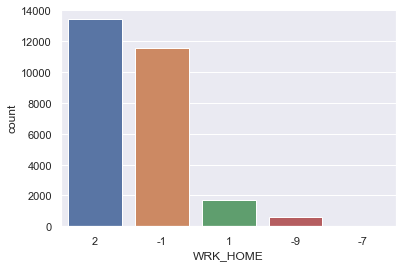

In [78]:
cat_col_prop(nyorker,'WRK_HOME')

print('prolly split -1: not working, 2:No, 1: Yes')

    counts  percentage
-1   12172   44.618768
 1   11799   43.251466
 2    3300   12.096774
-7       7    0.025660
-8       2    0.007331
similiar regarding the non workers 51%


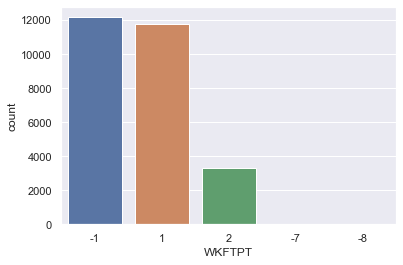

In [79]:
cat_col_prop(nyorker,'WKFTPT')

print('similiar regarding the non workers 51%')

     counts  percentage
-1    11549   42.335044
 4     8410   30.828446
 1     3116   11.422287
 3     1826    6.693548
 2     1730    6.341642
-9      623    2.283724
 97      18    0.065982
-8        5    0.018328
-7        3    0.010997
similiar not working


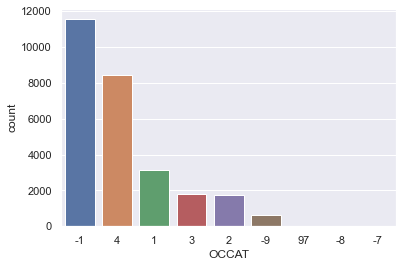

In [80]:
cat_col_prop(nyorker,'OCCAT')
print('similiar not working')

In [81]:
df = nyorker.merge(ny, how='left', left_on = 'HOUSEID', right_on = 'HOUSEID')
df

,HOUSEID,PERSONID,R_AGE,EDUC,R_RACE,R_SEX,WRK_HOME,WKFTPT,OCCAT,DRIVER,...,HHFAMINC,NUMADLT_ratio,YOUNGCHILD_ratio,WRKCOUNT_ratio,MSACAT,MSASIZE,URBAN,URBANSIZE,URBRUR,LIF_CYC
0,30000012,1,45,5,1,2,2,1,4,1,...,10,1,0,1,3,3,1,3,1,1
1,30000082,1,39,5,1,2,2,1,2,1,...,8,>0.5,>0.5,>0.5,3,3,1,3,1,4
2,30000082,2,38,4,1,1,2,1,4,1,...,8,>0.5,>0.5,>0.5,3,3,1,3,1,4
3,30000130,1,45,5,1,2,2,1,2,1,...,5,1,0,1,1,5,1,5,1,2
4,30000130,2,45,4,1,1,2,1,2,1,...,5,1,0,1,1,5,1,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27275,40793808,1,59,4,1,1,1,2,4,1,...,7,>0.5,0,>0.5,3,1,1,1,1,8
27276,40793808,2,50,4,1,2,2,1,4,1,...,7,>0.5,0,>0.5,3,1,1,1,1,8
27277,40793974,1,81,2,1,1,-1,-1,-1,1,...,3,1,0,0,3,1,1,1,1,9
27278,40794020,1,75,3,1,1,-1,-1,-1,1,...,8,1,0,0,4,6,4,6,2,10


In [82]:
# Merge with Trips to get the Y

In [83]:
(27295, 24)

(27295, 24)